# Biostat 2

Andreas Svendsen [](https://orcid.org/0000-0001-8050-6447) (SDU)  
December 11, 2023

Testing if the GLM with a poisson distribution is suitable for differential gene expresseion analysis.

In [ ]:
library(kableExtra)
library(limma)
library(edgeR)
library(data.table)
library(ggplot2)

## 1 Introduction

Inflammation is a complex biological response that is pivotal in various pathological conditions. These range from systemic inflammatory diseases, such as rheumatoid arthritis and sepsis, to lower-grade chronic inflammatory states such as type 2 diabetes mellitus. Given the prevalence of systemic inflammation, understanding its interaction with drug metabolism is of substantial clinical relevance.

Drug-metabolizing enzymes and transporters (DMETs), predominantly found in hepatocytes within the liver, are central to the biotransformation of a wide variety of compounds. Inflammation has been shown to modulate the activity of these DMETs, a phenomenon that could potentially affect the pharmacokinetics of numerous medications. For individuals with altered inflammatory status—whether due to a chronic condition like diabetes or an acute event like sepsis—this modulation can have significant implications. It may necessitate adjustments in drug dosages to avoid adverse effects or therapeutic failure.

Previous research has provided valuable insights into the effects of inflammation on DMETs, but a clear correlation between in vitro studies and clinical observations remains elusive. For instance *Dunvald et al.* Dunvald et al. ([n.d.](#ref-dunvald)) conducted a comprehensive review of the clinical and in vitro evidence on inflammation-mediated modulation of DMETs and the impact on drug metabolism in humans. They found that in vitro studies in primary human hepatocytes revealed strong evidence of downregulation of key cytochrome P450 (CYP) enzymes by inflammatory cytokines such as IL-6 and IL-1β. However, these studies often employed supraphysiological cytokine doses, which may not accurately represent the inflammatory conditions observed in patients.

Levels of IL-6 and IL-1B in healthy individuals are generally low, with reports ranging from undetectable to **XXX** in adults ([Kim et al. 2011](#ref-kim2011); [Kleiner et al. 2013](#ref-kleiner2013)). In contrast, cytokine levels may be considerably elevated with IL-6 levels of ZZZ among patients with rheumatoid arthritis (ref) to YYY for patients with acute inflammation caused by sepsis (ref). These variations in cytokine levels, which span a wide range in different pathological states, highlight the complex and dynamic nature of inflammation and underscore the need for research that considers this variability when investigating the effects of inflammation on drug-metabolizing enzymes.

Recently, 3D primary human hepatocytes (PHH) have challenged 2D PHH as a more physiologically relevant culture method of PHH. 3D culture leads to more stable cell cultures that retain their hepatic phenotype for extended periods of time. Consequently, this 3D PHH have been shown to predict CYP induction and hepatotoxicity more accurately than 2D PHH (REFS). Historically, 2D PHH have been utilized to study the effect of inflammation Ingelman-Sundberg and Lauschke ([n.d.](#ref-ingelman-sundberg)) …Another claim for the lack of correlation discussed in the review by AC et al. is that there might be methodolocial limitiation to the widespread use of 2D models of PHHs.

We aimed to utilize 3D primary human hepatocytes (REF, characterization article) to study the impact of physiologically relevant concentrations of cytokines on CYP expression and activity. This may help further our understanding of the impact of inflammation on clinical drug metabolism among patients with inflammation. This, in turn, may inform more precise and adaptive prescribing strategies for patients in various inflammatory states.

As part of this project we wish to do a whole mRNA sequencing and differential gene expression analysis, too see which genes are up or down regulated, and subsequently do pathway analysis and gene set enrichment analysis. The first part of this sequencing analysis is the main concern of this assignment.

## 2 Materials and Methods

The data set consists of count data obtained from mRNA sequencing of primary human hepatocytes from a single donor. Of interest for this project there are five groups in total: one control and four treated with either 10 ng/ml or 0.1 ng/ml of IL-6 or IL-1B:

• Vehicle control (no cytokine exposure)

• IL-6 at 10 ng/ml

• IL-6 at 0.1 ng/ml

• IL-1B at 10 ng/ml

• IL-1B at 0.1 ng/ml

There are further samples in the data which are not directly related to this project.

Each treatment and control group consists of duplicate samples, each sample originates from hepatocytes from 24 wells, with each well containing 1500 hepatocytes. Originating from one donor, these samples are pseudo-biological replicates, capturing intra-donor response variability and experimental nuances, such as differences in seeding, treatment application or other procedural variables, rather than genetic diversity/inter-individual biological variation. Although not optimal, this is exploratory data and while limiting the ability to generalize findings across a population, it allows for a nuanced understanding of cytokine effects at the individual level.

Following cytokine treatment, total RNA was extracted from the hepatocytes and subjected to mRNA isolation to enrich for the coding transcripts. The mRNA was then sequenced using the Illumina NovaSeq 6000 system. Sequencing data were processed to generate .fastq files, and aligned to a reference human transcriptome. Quality controls were implemented to ensure data integrity.

The primary output is a dataset of count data, specifically gene counts, which quantify the number of sequencing reads aligned to each gene, indicating gene expression levels. Accompanying this dataset are gene annotation and sample information files, which provide the foundation for the forthcoming differential gene expression analysis.

**Purpose of analysis**

The overarching aim of this analysis is to discern the differential gene expression profiles in primary human hepatocytes under the influence of inflammatory cytokines, specifically IL-6 and IL-1B. By comparing gene expression levels between cytokine-treated and control samples, we seek to:

1.  Identify the genes that are significantly upregulated or downregulated in response to each cytokine, with an emphasis on drug metabolizing enzymes. This will allow us to compare mRNA sequencing data with qPCR data for these enzymes, providing a validation layer to the findings.

2.  Use the output of the differential gene expression analysis to, later on, conduct pathway analysis and gene set enrichment analysis to better understand the broader biological processes that are impacted by cytokine exposure.

3.  Determine whether IL-6 and IL-1B share common pathways in altering gene expression or if they act on distinct sets of genes.This might shed light on the intricacies of inflammatory responses at the molecular level.

4.  The response variable in this study is the expression level of each after treatment with cytokines relative to the expression of the controls. The hypothesis is that exposure to IL-6 and IL-1B will result in a downregulation of drug metabolizing enzymes, reflecting the inhibitory nature of inflammation on hepatic drug metabolism.

## 3 Statistical methods and results

All data and statistical analysis is available at: <https://github.com/andreasludvig/biostat_project>

As the main part of this project i will use a generalized linear model with a poisson distribution and log link to investigate if any CYP enzymes are statistically differentiated expressed in the genes that are treated with cytokines as compared to vehicle control.

### 3.1 Exploratory data analysis.

#### 3.1.1 Data content

The matrix of gene counts, gene annotation file and sample information file are loaded, tidied and saved as an DGE_object (basically just a list). Code in `notebooks/00-load_data.qmd`. First lines and structure of each element of this DGE list:

In [ ]:
dge_data <- readRDS("notebooks/outputs/data_processed/dge_data.rds")

**Count matrix**: Each column is a sample and each row is a gene with the count for each sample

In [ ]:
# View the counts matrix
head(dge_data$counts)

    S1   S2   S5   S6   S7   S8  S11  S12  S13  S14  S15  S16 S17  S18  S19
1 1327 1322 1105 2569 2696 1513 1597 1107 1681 1751 1709 1447 944 1324 3266
2    0    0    0    2    0    2    0    0    1    0    0    0   1    0    8
3  545  607  478 1041  694  480  644  530  620  583  866  933 569  843 1509
4  414  482  351  778  786  529  443  429  689  684  544  544 190  411  820
5   73   49   42  117  116   83   73   53   79  118   84   93  34   65  108
6  163  190  123  295  188  131  152  126  258  200  154  183  61   98  403
   S20
1 1193
2    1
3  587
4  293
5   55
6   90

**Sample info:** A dataframe with information on samples

In [ ]:
head(dge_data$samples)

   group lib.size norm.factors       treatment sample_name replicate
S1     1 27936538            1 Vehicle_control    AS0018_1         1
S2     1 30783447            1 Vehicle_control    AS0018_2         2
S5     2 23849669            1   01_ng_ml_IL_6    AS0018_5         1
S6     2 50753398            1   01_ng_ml_IL_6    AS0018_6         2
S7     3 43975254            1   10_ng_ml_IL_6    AS0018_7         1
S8     3 28500067            1   10_ng_ml_IL_6    AS0018_8         2
   group_color
S1     #000000
S2     #000000
S5     #A6CEE3
S6     #A6CEE3
S7     #1F78B4
S8     #1F78B4

**Gene annotation:** File of gene names and symbols, matching the rows in the count matrix

In [ ]:
head(dge_data$genes)

      ENSEMBLE_ID   symbol                id_symbol
1 ENSG00000000003   TSPAN6   ENSG00000000003;TSPAN6
2 ENSG00000000005     TNMD     ENSG00000000005;TNMD
3 ENSG00000000419     DPM1     ENSG00000000419;DPM1
4 ENSG00000000457    SCYL3    ENSG00000000457;SCYL3
5 ENSG00000000460 C1orf112 ENSG00000000460;C1orf112
6 ENSG00000000938      FGR      ENSG00000000938;FGR

#### 3.1.2 Basic summary statistics and visualization

``` python
raw_summary_statistics <- summary(dge_data$counts)

raw_summary_statistics |> kbl(format = "simple")
```

|     |       S1        |       S2        |       S5        |      S6       |       S7        |       S8        |       S11       |      S12      |       S13       |       S14       |       S15       |      S16      |      S17       |       S18       |      S19      |       S20       |
|-----|:---------------:|:---------------:|:---------------:|:-------------:|:---------------:|:---------------:|:---------------:|:-------------:|:---------------:|:---------------:|:---------------:|:-------------:|:--------------:|:---------------:|:-------------:|:---------------:|
|     |   Min. : 0.0    |   Min. : 0.0    |   Min. : 0.0    |   Min. : 0    |   Min. : 0.0    |   Min. : 0.0    |   Min. : 0.0    |   Min. : 0    |   Min. : 0.0    |   Min. : 0.0    |   Min. : 0.0    |   Min. : 0    |   Min. : 0.0   |   Min. : 0.0    |   Min. : 0    |   Min. : 0.0    |
|     |  1st Qu.: 0.0   |  1st Qu.: 0.0   |  1st Qu.: 0.0   |  1st Qu.: 0   |  1st Qu.: 0.0   |  1st Qu.: 0.0   |  1st Qu.: 0.0   |  1st Qu.: 0   |  1st Qu.: 0.0   |  1st Qu.: 0.0   |  1st Qu.: 0.0   |  1st Qu.: 0   |  1st Qu.: 0.0  |  1st Qu.: 0.0   |  1st Qu.: 0   |  1st Qu.: 0.0   |
|     |  Median : 0.0   |  Median : 0.0   |  Median : 0.0   |  Median : 0   |  Median : 0.0   |  Median : 0.0   |  Median : 0.0   |  Median : 0   |  Median : 0.0   |  Median : 0.0   |  Median : 0.0   |  Median : 0   |  Median : 0.0  |  Median : 0.0   |  Median : 0   |  Median : 0.0   |
|     |  Mean : 445.5   |  Mean : 490.9   |  Mean : 380.3   |  Mean : 809   |  Mean : 701.2   |  Mean : 454.5   |  Mean : 485.1   |  Mean : 376   |  Mean : 552.4   |  Mean : 539.8   |  Mean : 589.6   |  Mean : 606   |  Mean : 345.7  |  Mean : 470.2   |  Mean : 963   |  Mean : 364.1   |
|     |  3rd Qu.: 6.0   |  3rd Qu.: 7.0   |  3rd Qu.: 5.0   |  3rd Qu.: 11  |  3rd Qu.: 8.0   |  3rd Qu.: 5.0   |  3rd Qu.: 7.0   |  3rd Qu.: 6   |  3rd Qu.: 8.0   |  3rd Qu.: 8.0   |  3rd Qu.: 8.0   |  3rd Qu.: 8   |  3rd Qu.: 5.0  |  3rd Qu.: 6.0   |  3rd Qu.: 14  |  3rd Qu.: 6.0   |
|     | Max. :2538985.0 | Max. :2704036.0 | Max. :2141005.0 | Max. :4703701 | Max. :1749370.0 | Max. :1070663.0 | Max. :2310630.0 | Max. :1712257 | Max. :1676606.0 | Max. :1475056.0 | Max. :2717621.0 | Max. :2757600 | Max. :934710.0 | Max. :1271255.0 | Max. :5309784 | Max. :1956794.0 |

Table 1: Raw summary statistics

From the raw summary statistics in <a href="#tbl-raw-sum-stats" class="quarto-xref">Table 1</a> we note that the data is heavily **zero-inflated**, as a significant portion of the counts are zero across all samples. This is not uncommon in RNA-seq data. Probably also very likely since we have just one cell type and are aligning with the entire human transcriptome. The maximum counts are substantially higher than the 75th percentile, indicating the presence of **outliers or highly expressed genes**. The data is heavily **skewed**, with mean values much higher than the median (50th percentile), which is zero in most cases.

``` python
# In ggplot:
# Convert the matrix to a long-form data.frame for ggplot
expression_long <- as.data.frame(as.table(dge_data$counts))
# Create the boxplot using ggplot2
boxplot_raw_counts <- ggplot(expression_long, aes(x=Var2, y=Freq)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Samples", y = "Expression Count") +
  ggtitle("Distribution of Gene Expression Counts Across Samples")
 

boxplot_raw_counts
```

<figure id="fig-boxplot-counts">
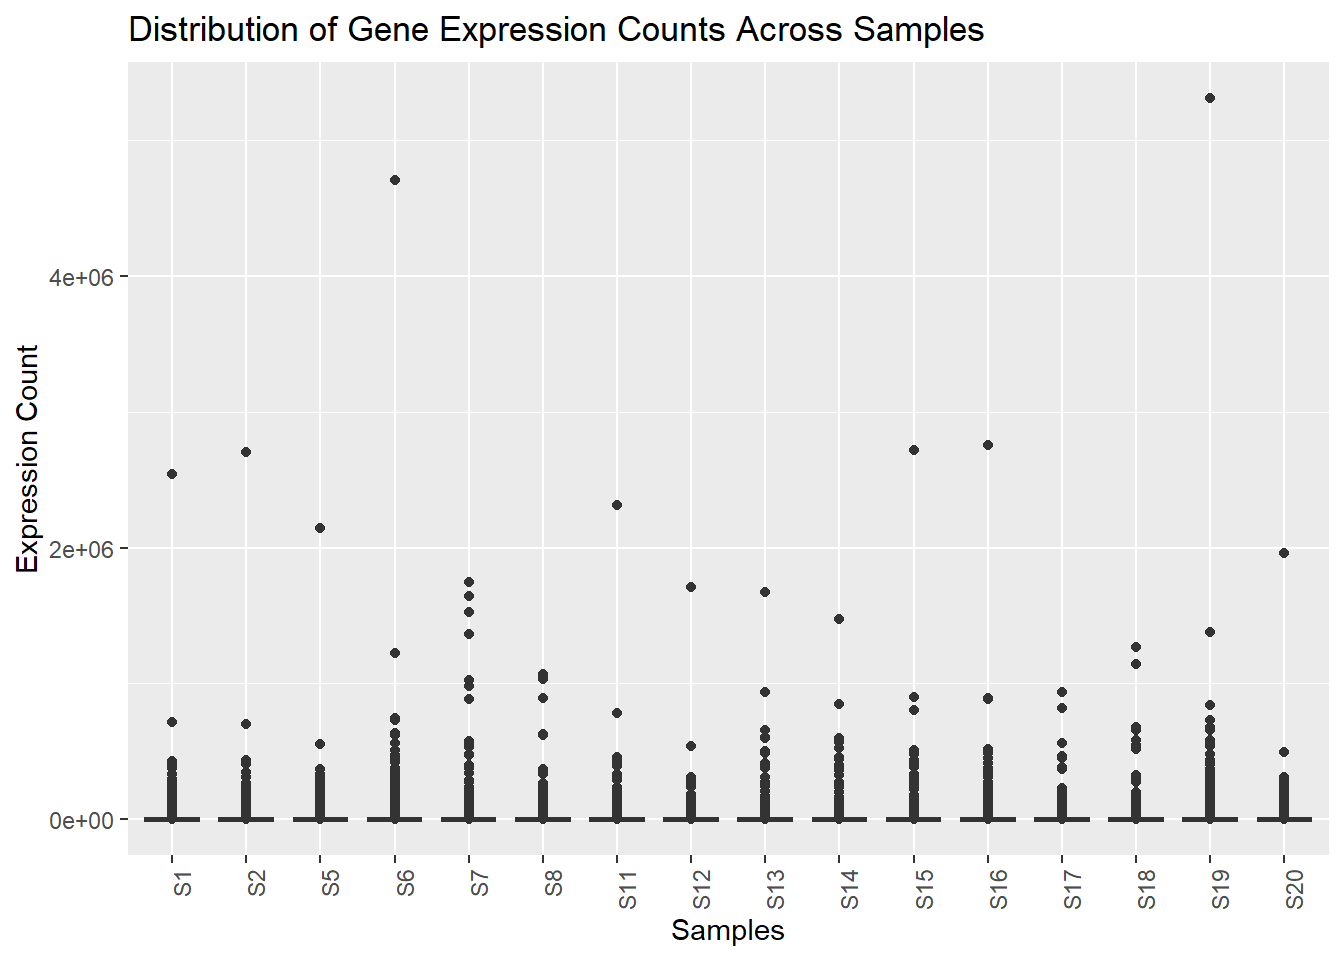
<figcaption>Figure 1: Note there are &gt; 60 000 genes/sample, and these are boxplots</figcaption>
</figure>

This can also be visualized in a boxplot in <a href="#fig-boxplot-counts" class="quarto-xref">Figure 1</a>

### 3.2 Filter and normalize the data

Code for filtering and normalization is in the `notebooks/02-filter_normalize.qmd` script.

We are filtering genes with less than one count per million (CPM). After filtering low count genes we have filtered out 49098 genes and are left with 13612 genes, and after removal of duplicates we are left with 13610 genes.

### 3.3 Unsupervised data visualization

### 3.4 Differential gene expression analysis

For this project, we will fit a Generalized Linear Model (GLM) using the Poisson distribution with a log link function. Our primary interest lies in comparing treated vs. untreated samples, regardless of the concentration. This approach is chosen over a more nuanced model incorporating concentrations as a continuous variable due to the limited variation in concentrations (only two per treatment), which might not provide robust estimations in a continuous model.

The model we will use is:

$log(\lambda) = \alpha + \beta_1*x_1$ ,

where $\lambda$ represents the expected count, $\alpha$ is the baseline rate of counts for the untreated group, and $\beta_1$ is the rate ratio for the treatment effect. In this model, $x_1$ is a binary indicator for treatment, with 0 indicating control (untreated) and 1 indicating treated samples.

This formual also translates to log(rate) = baselinerate/unexposed_rate \* exposure_rate_ratio

Poisson regression is appropriate for modeling count data where the dependent variable is assumed to follow a Poisson distribution. This model assumes that the logarithm of the expected count is linearly related to the independent variables. A critical assumption of the Poisson model is that the mean equals the variance, a condition often violated in RNA-seq data due to overdispersion. Therefore, this analysis serves as an initial step, and more sophisticated models may be required for a complete understanding of the dataset.

In [ ]:
dge_data_norm <- readRDS("notebooks/outputs/data_processed/dge_data_norm.rds")


keep_indices <- grep("^CYP", dge_data_norm$genes$symbol)

cyp_data <- dge_data_norm[keep_indices, keep.lib.sizes = FALSE]


# cyp_data is the subset of genes we want to investigate
counts <- cyp_data$counts
genes <- rownames(counts)
samples <- colnames(counts)

# Creating a long-format data frame
data_long <- data.frame(gene = rep(genes, each = length(samples)),
                        sample = rep(samples, times = length(genes)),
                        count = as.vector(counts),
                        treatment = cyp_data$samples$treatment)

# Select the first gene
first_gene <- unique(data_long$gene)[1]
first_gene_data <- subset(data_long, gene == first_gene)

# For each cytokine treatment, create a binary variable that is 1 for that specific cytokine treatment and 0 for the vehicle control.

first_gene_data$treatment_IL_6_01_ng_ml <- as.numeric(first_gene_data$treatment == "01_ng_ml_IL_6")
first_gene_data$treatment_IL_6_10_ng_ml <- as.numeric(first_gene_data$treatment == "10_ng_ml_IL_6")
first_gene_data$treatment_IL_1B_01_ng_ml <- as.numeric(first_gene_data$treatment == "01_ng_ml_IL_1B")
first_gene_data$treatment_IL_1B_10_ng_ml <- as.numeric(first_gene_data$treatment == "10_ng_ml_IL_1B")

In [ ]:
# Poisson models for each cytokine treatment
poisson_model_IL_6_01_ng_ml <- glm(count ~ treatment_IL_6_01_ng_ml, family = poisson(), data = first_gene_data)
poisson_model_IL_6_10_ng_ml <- glm(count ~ treatment_IL_6_10_ng_ml, family = poisson(), data = first_gene_data)
poisson_model_IL_1B_01_ng_ml <- glm(count ~ treatment_IL_1B_01_ng_ml, family = poisson(), data = first_gene_data)
poisson_model_IL_1B_10_ng_ml <- glm(count ~ treatment_IL_1B_10_ng_ml, family = poisson(), data = first_gene_data)

summary(poisson_model_IL_6_01_ng_ml)


Call:
glm(formula = count ~ treatment_IL_6_01_ng_ml, family = poisson(), 
    data = first_gene_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             10.669258   0.001289    8279   <2e-16 ***
treatment_IL_6_01_ng_ml  0.767586   0.002656     289   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1016536  on 15  degrees of freedom
Residual deviance:  944330  on 14  degrees of freedom
AIC: 944524

Number of Fisher Scoring iterations: 6


Call:
glm(formula = count ~ treatment_IL_6_10_ng_ml, family = poisson(), 
    data = first_gene_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             10.835898   0.001186 9139.33   <2e-16 ***
treatment_IL_6_10_ng_ml -0.288519   0.003813  -75.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1016536  on 15  degrees of freedom
Residual deviance: 1010347  on 14  degrees of freedom
AIC: 1010541

Number of Fisher Scoring iterations: 6


Call:
glm(formula = count ~ treatment_IL_1B_01_ng_ml, family = poisson(), 
    data = first_gene_data)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              10.878530   0.001161  9373.5   <2e-16 ***
treatment_IL_1B_01_ng_ml -0.853444   0.004846  -176.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1016536  on 15  degrees of freedom
Residual deviance:  976359  on 14  degrees of freedom
AIC: 976553

Number of Fisher Scoring iterations: 5


Call:
glm(formula = count ~ treatment_IL_1B_10_ng_ml, family = poisson(), 
    data = first_gene_data)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              10.883578   0.001158  9401.5   <2e-16 ***
treatment_IL_1B_10_ng_ml -0.945326   0.005048  -187.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1016536  on 15  degrees of freedom
Residual deviance:  969605  on 14  degrees of freedom
AIC: 969800

Number of Fisher Scoring iterations: 5

In [ ]:
# Creating a summary data frame
summary_data <- 
  data.frame(
    Treatment = 
      c("IL-6 01 ng/ml", "IL-6 10 ng/ml", "IL-1B 01 ng/ml", "IL-1B 10 ng/ml"
        ),
    Log_Expected_Count_Intercept = 
      c(coef(poisson_model_IL_6_01_ng_ml)["(Intercept)"],
        coef(poisson_model_IL_6_10_ng_ml)["(Intercept)"],
        coef(poisson_model_IL_1B_01_ng_ml)["(Intercept)"],
        coef(poisson_model_IL_1B_10_ng_ml)["(Intercept)"]
        ),
    Coefficient = 
      c(coef(poisson_model_IL_6_01_ng_ml)["treatment_IL_6_01_ng_ml"],
        coef(poisson_model_IL_6_10_ng_ml)["treatment_IL_6_10_ng_ml"],
        coef(poisson_model_IL_1B_01_ng_ml)["treatment_IL_1B_01_ng_ml"],
        coef(poisson_model_IL_1B_10_ng_ml)["treatment_IL_1B_10_ng_ml"]),
    P_Value = c(summary(poisson_model_IL_6_01_ng_ml)$coefficients["treatment_IL_6_01_ng_ml", "Pr(>|z|)"],
                summary(poisson_model_IL_6_10_ng_ml)$coefficients["treatment_IL_6_10_ng_ml", "Pr(>|z|)"],
                summary(poisson_model_IL_1B_01_ng_ml)$coefficients["treatment_IL_1B_01_ng_ml", "Pr(>|z|)"],
                summary(poisson_model_IL_1B_10_ng_ml)$coefficients["treatment_IL_1B_10_ng_ml", "Pr(>|z|)"]
                )
)

# Calculating actual expected counts and fold changes
summary_data$Expected_Count = exp(summary_data$Log_Expected_Count_Intercept)
summary_data$Fold_Change = exp(summary_data$Coefficient)

row.names(summary_data) <- NULL

# Print the summary table
print(summary_data)

       Treatment Log_Expected_Count_Intercept Coefficient P_Value
1  IL-6 01 ng/ml                     10.66926   0.7675856       0
2  IL-6 10 ng/ml                     10.83590  -0.2885188       0
3 IL-1B 01 ng/ml                     10.87853  -0.8534440       0
4 IL-1B 10 ng/ml                     10.88358  -0.9453265       0
  Expected_Count Fold_Change
1       43013.00   2.1545579
2       50812.50   0.7493727
3       53025.57   0.4259454
4       53293.93   0.3885527

TBD. Finish the unsupervised visualisations. Interpret the results here. Calculate overdispersion. visualise models? Think about negative binomial model.

## References

Dunvald, Ann-Cathrine Dalgård, Erkka Järvinen, Christina Mortensen, and Tore B. Stage. n.d. “Clinical and Molecular Perspectives on Inflammation-Mediated Regulation of Drug Metabolism and Transport.” *Clinical Pharmacology & Therapeutics* n/a (n/a). <https://doi.org/10.1002/cpt.2432>.

Ingelman-Sundberg, Magnus, and Volker M. Lauschke. n.d. “3D Human Liver Spheroids for Translational Pharmacology and Toxicology.” *Basic & Clinical Pharmacology & Toxicology* n/a (n/a). <https://doi.org/10.1111/bcpt.13587>.

Kim, Hyun Ok, Han-Soo Kim, Jong-Chan Youn, Eui-Cheol Shin, and Sungha Park. 2011. “Serum Cytokine Profiles in Healthy Young and Elderly Population Assessed Using Multiplexed Bead-Based Immunoassays.” *Journal of Translational Medicine* 9 (1): 113. <https://doi.org/10.1186/1479-5876-9-113>.

Kleiner, Giulio, Annalisa Marcuzzi, Valentina Zanin, Lorenzo Monasta, and Giorgio Zauli. 2013. “Cytokine Levels in the Serum of Healthy Subjects.” *Mediators of Inflammation* 2013: 1–6. <https://doi.org/10.1155/2013/434010>.